In [147]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif
from itertools import combinations_with_replacement 

In [148]:
df = pd.read_csv('./dataset/IRIS.csv')
df[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [156]:
def table_diagnose(df, target):
    new_df = df.copy(deep=True)
    X = df.drop(columns=target)
    y = df[target] if df[target].dtype == 'object' else np.nan

    def IQR(x):
        q1 = x.quantile(0.25)
        q3 = x.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        return lower_bound, upper_bound

    result = (new_df
            .agg([lambda x: x.isnull().sum(), 
                lambda x: x.nunique(), 
                lambda x: x.dtype,
                lambda x:  x.unique() if x.nunique() < 10 else np.nan,
                lambda x: x.isna().mean() * 100,
                lambda x:  x.skew() if x.dtype == 'float' or x.dtype == 'int' else np.nan,
                lambda x: IQR(x)[0] if x.dtype != 'object' else np.nan,
                lambda x: IQR(x)[1] if x.dtype != 'object' else np.nan,
                lambda x: f_classif(x.values.reshape(-1,1), y)[0][0] if x.name != y.name else np.nan,
                lambda x: f_classif(x.values.reshape(-1,1), y)[1][0] if x.name != y.name else np.nan,
                ])
    ).T.reset_index()
    col_names = [
        'columns', 
        'n null', 
        'n unique', 
        'types', 
        'unique vals', 
        'percentages null (%)', 
        'skewness', 
        'IQR (< lower)', 
        'IQR (> upper)', 
        f'corr_vals ({y.name})', 
        f'p_vals ({y.name})'
    ]
    result.set_axis(col_names, axis=1, inplace=True)
    return result

In [157]:
table_diagnose(df, 'species')

,columns,n null,n unique,types,unique vals,percentages null (%),skewness,IQR (< lower),IQR (> upper),corr_vals (species),p_vals (species)
0,sepal_length,0,35,float64,NaN,0.0,0.314911,3.15,8.35,119.264502,0.0
1,sepal_width,0,23,float64,NaN,0.0,0.334053,2.05,4.05,47.364461,0.0
2,petal_length,0,43,float64,NaN,0.0,-0.274464,-3.65,10.35,1179.034328,0.0
3,petal_width,0,22,float64,NaN,0.0,-0.104997,-1.95,4.05,959.324406,0.0
4,species,0,3,object,"[Iris-setosa, Iris-versicolor, Iris-virginica]",0.0,NaN,NaN,NaN,NaN,NaN


In [158]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [159]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.1 KB


In [160]:
def plot_features(dataset, feature_columns, target_column, cols=3, rows=5, types_plot='scatter', kde=False, bins=10):
    plt.figure(figsize=(16, 25))
    comb = combinations_with_replacement(feature_columns, 2)
    comb = [(x, y) for x, y in comb]

    if types_plot == 'scatter':
        for idx, col in enumerate(list(comb)):
            plt.subplot(rows, cols, idx+1)
            sns.scatterplot(data=dataset, x=col[0], y=col[1], hue=target_column)
    else:
        for idx, col in enumerate(feature_columns):
            plt.subplot(rows, cols, idx+1)
            if types_plot == 'boxplot':
                sns.boxplot(
                    x=col, 
                    y=target_column if target_column else None, 
                    data=dataset,
                    showmeans=True
                )
            elif types_plot=='histogram':
                sns.histplot(
                    x=col, 
                    hue=target_column if target_column else None, 
                    data=dataset,
                    kde=kde,
                    bins=bins
                )
    plt.tight_layout()
    plt.show()

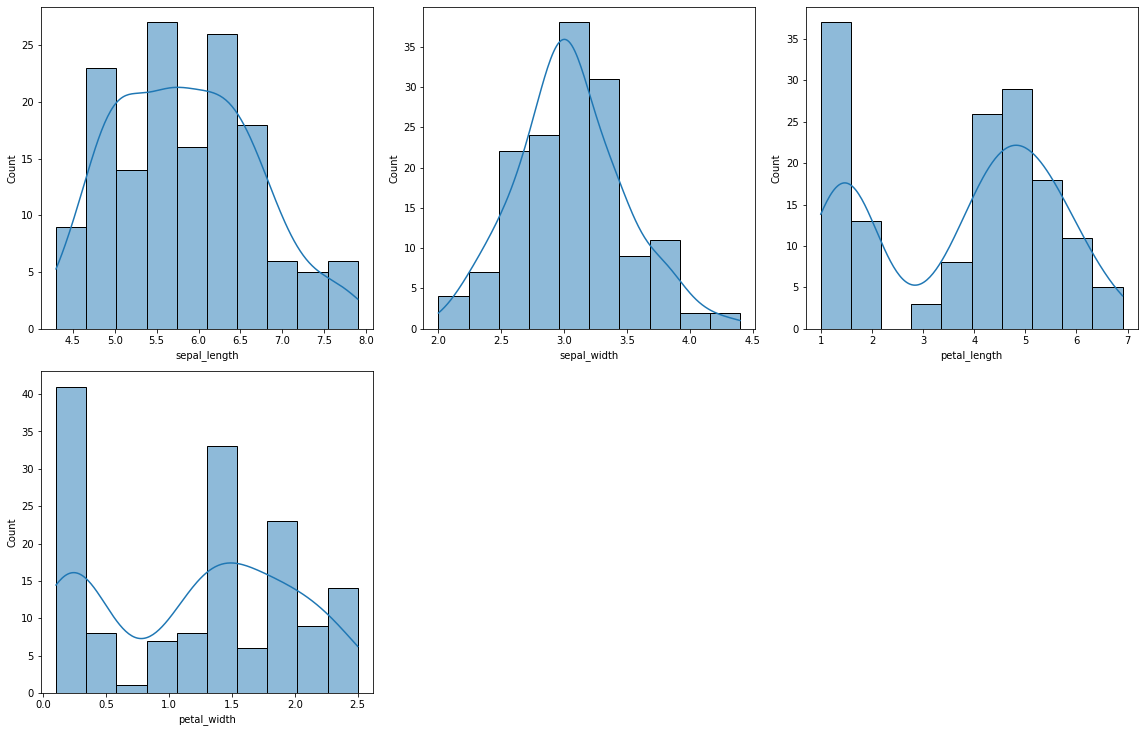

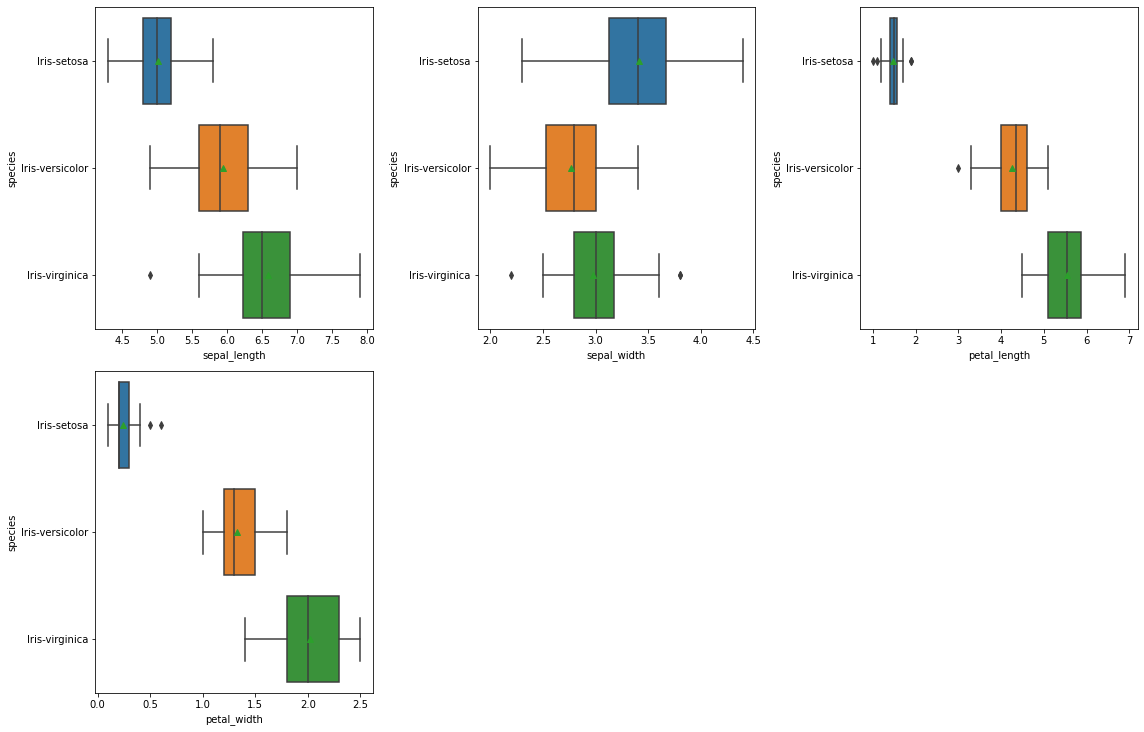

In [165]:
X = df.drop(columns='species')
y = df['species']
plot_features(dataset=df, feature_columns=X.columns, target_column='', types_plot='histogram', kde=True)
plot_features(dataset=df, feature_columns=X.columns, target_column=y.name, types_plot='boxplot', kde=True)

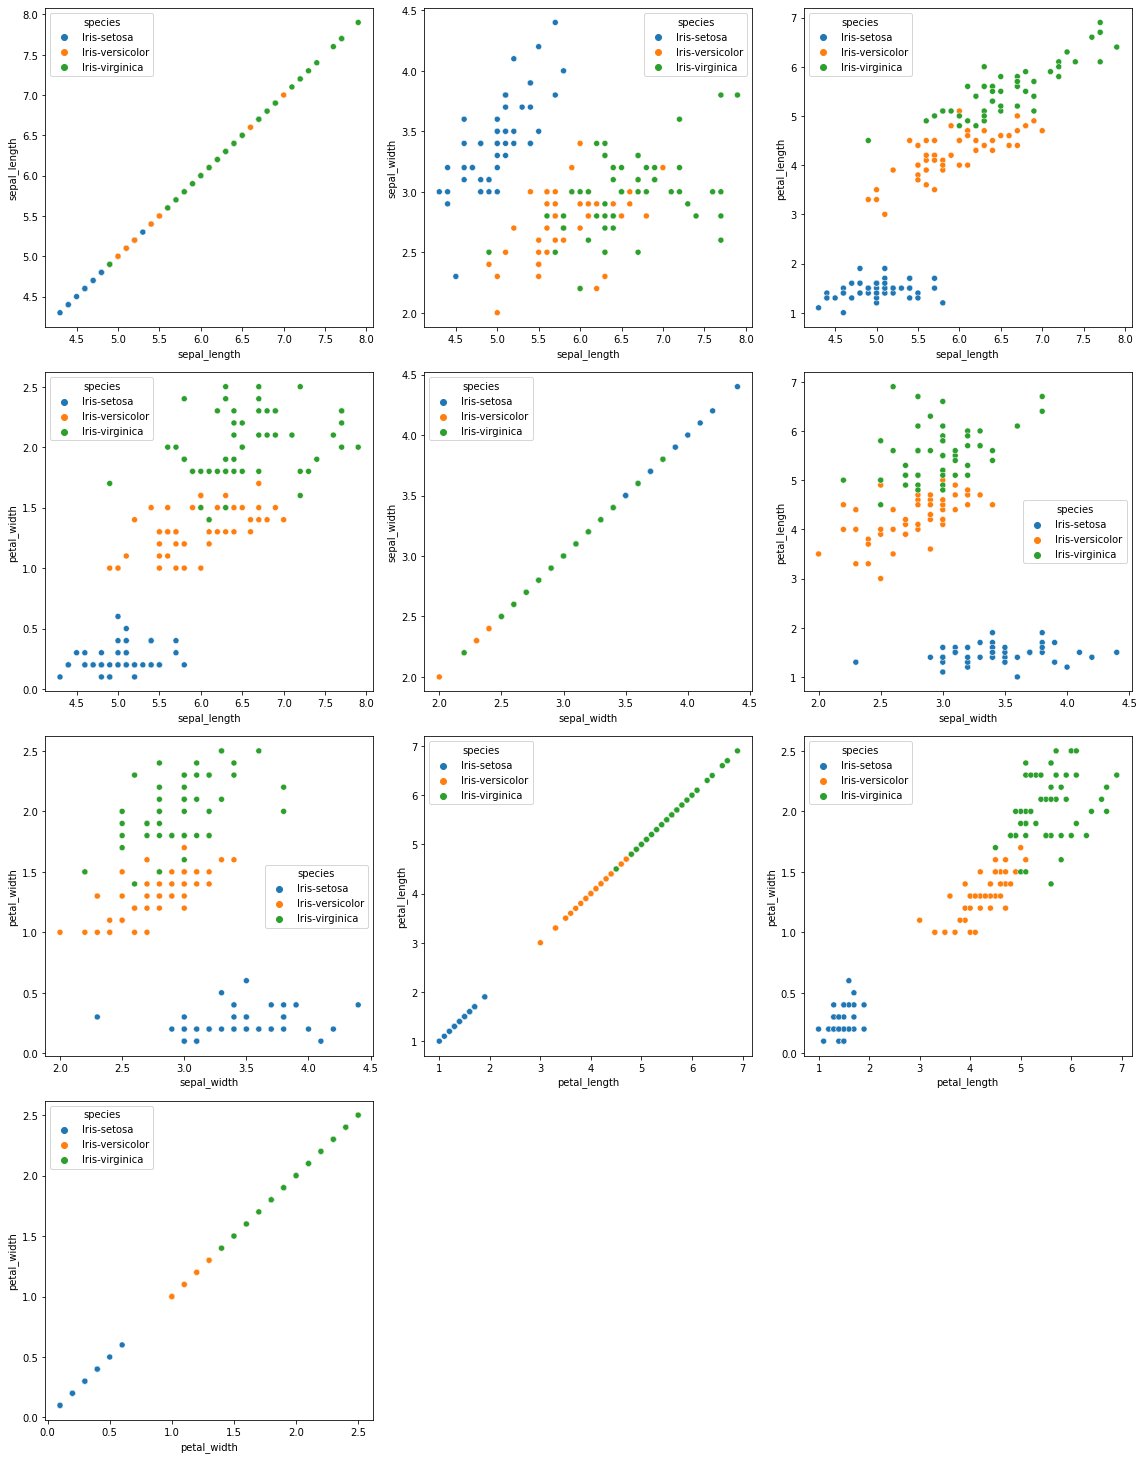

In [166]:
plot_features(dataset=df, feature_columns=X.columns, target_column=y.name, types_plot='scatter')

In [155]:
table_diagnose(df, 'species')

,columns,n null,n unique,types,unique vals,percentages null (%),skewness,IQR (< lower),IQR (> upper),corr_vals (species),p_vals (species)
0,sepal_length,0,35,float64,NaN,0.0,0.314911,3.15,8.35,119.264502,0.0
1,sepal_width,0,23,float64,NaN,0.0,0.334053,2.05,4.05,47.364461,0.0
2,petal_length,0,43,float64,NaN,0.0,-0.274464,-3.65,10.35,1179.034328,0.0
3,petal_width,0,22,float64,NaN,0.0,-0.104997,-1.95,4.05,959.324406,0.0
4,species,0,3,object,"[Iris-setosa, Iris-versicolor, Iris-virginica]",0.0,NaN,NaN,NaN,NaN,NaN
